# Tutorial de Big Data (UdeSA) 2025
## Tutorial 4 - Parte 1


Componentes principales (PCA, en inglés) es una técnica de **aprendizaje no supervisado**. Es decir que nos encontramos en una situación donde tenemos información de un conjunto de variables o features ($X_1, X_2, ..., X_p$), pero no sobre una variable de resultado o outcome ($Y$). Vamos a tratar de ajustar algoritmos que interpreten la distribución de nuestros datos y encuentren relaciones interesantes entre éstos, trabajando con la naturaleza propia de los datos y sin un outcome de interés $Y$.  
Esto se diferencia del **aprendizaje supervisado**, caso en el cual los estimadores se usan para **predecir** resultados basados en datos que poseen un outcome o variable de resultado $Y$ (puede ser una etiqueta -clasificación- o un valor -regresión-).

Los algoritmos de aprendizaje no supervisado pueden ser muy útiles para casos en los que se busca **reducir la dimensionalidad**, por ejemplo cuando se busca visualizar datos de gran dimensionalidad o se busca crear un índice. PCA suele emplearse como parte del **análisis descriptivo y exploratorio de datos**.

Supongamos que tenemos $n$ observaciones y $p$ variables y queremos visualizarlas como parte de una análisis exploratorio de los datos.

Podríamos realizar gráficos de a 2 variables, pero serían muchos si $p$ es grande... $$ {p \choose 2} = \frac{p!}{2(p-2)!}$$

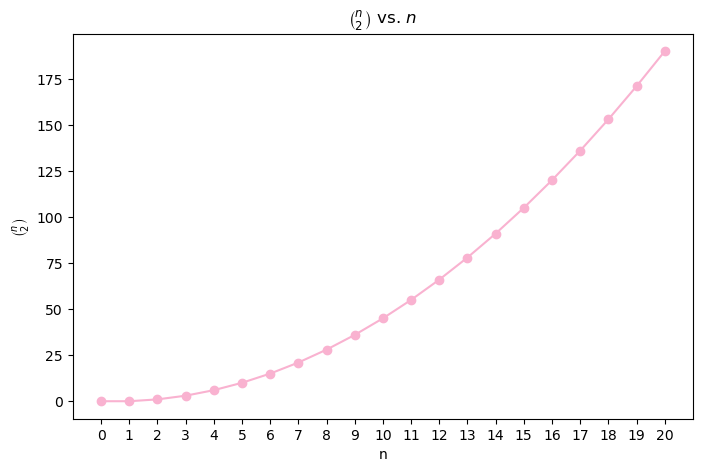

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Range of n values
n_values = np.arange(0, 21)  # from 0 to 20
combinations = n_values * (n_values - 1) / 2

# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, combinations, marker='o', color='#f9b2d0')
plt.title(r'$\binom{n}{2}$ vs. $n$')
plt.xlabel('n')
plt.ylabel(r'$\binom{n}{2}$')
plt.grid(False)
plt.xticks(n_values)
plt.show()


Entonces vamos a buscar una representación de los datos en menos dimensiones (2 usualmente) que capture la mayor información posible.

Las dimensiones serán combinaciones lineales de las $p$ variables que tienen la mayor varianza posible.

Vamos a trabajar con la librería [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### Ejemplo 1

In [4]:
#!pip install statsmodels
#!pip install scikit-learn
#!pip install ISLP

import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Vamos a trabajar con una base de datos que provee el libro ISLP.

##### Violent Crime Rates by US State
Contiene información sobre arrestos por asaltos, asesinatos y violaciones cada 100.000 habitantes en 50 estados de Estados Unidos en 1973. También tiene información sobre el porcentaje de población viviendo en zonas urbanas.

- Murder: Murder arrests (per 100,000)
- Assault: Assault arrests (per 100,000)
- Rape: Rape arrests (per 100,000)
- UrbanPop: Percent urban population

In [6]:
arrests = get_rdataset('USArrests').data
print(arrests.shape)
print("\n", arrests.info)
print("\n", arrests.dtypes)
print("\n", arrests.head())

(50, 4)

 <bound method DataFrame.info of                 Murder  Assault  UrbanPop  Rape
rownames                                       
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.

In [8]:
print(arrests.mean())

# Escalamos las variables
# Inicializamos el transformador
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
arrests_transformed = pd.DataFrame(scaler.fit_transform(arrests), columns=arrests.columns)
print(arrests_transformed.mean()) # luego de la estandarización la media es cero
#print(arrests_transformed.std()) # la desviación estandar es uno

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64


Nota: Por defecto, PCA() centra las variables para que tengan media cero pero no las escala

Aplicamos PCA. Estamos buscando maximizar la varianza de los predictores con la restricción de normalización

In [10]:
# Ajustamos el modelo
pca = PCA()
arrests_pca = pca.fit_transform(arrests_transformed)

# Scores
scores = arrests_pca

# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)

# Loadings vectors
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 
pca.components_[0,0] #loadings del CP1 variable 1


Varianza explicada: [0.62006039 0.24744129 0.0891408  0.04335752]
Loadings:
 [[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [-0.6492278   0.74340748 -0.13387773 -0.08902432]]
Loadings del CP1:
 [0.53589947 0.58318363 0.27819087 0.54343209]


0.5358994749381554

In [ ]:
#scores

In [12]:
# Notar que si tomamos los loadings del primer componente principal, por ejemplo:
(0.53589947)**2+(0.58318363)**2+(0.27819087)**2+(0.5434309)**2 
# La suma de sus cuadrados vemos que es igual a 1. Es la restricción que habíamos puesto!

0.9999986914724248

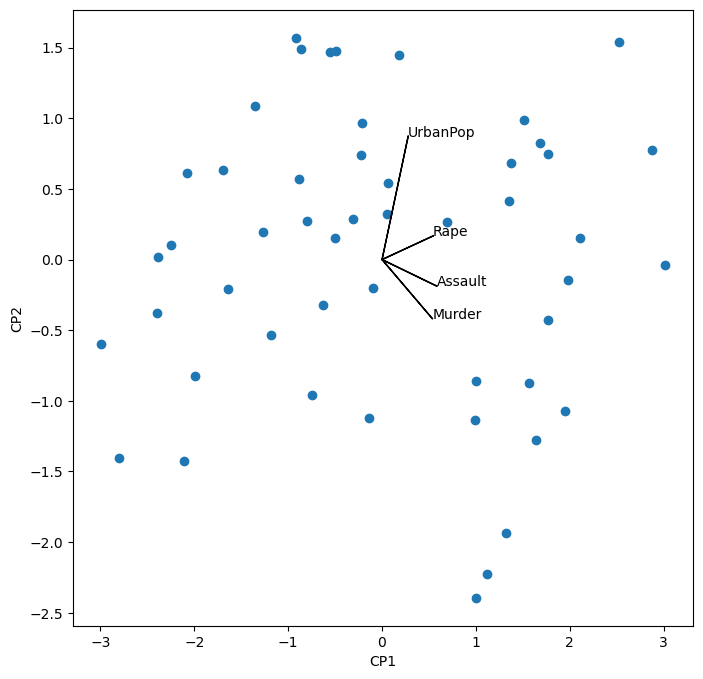

In [14]:
# Biplot
i, j = 0, 1 # Componentes
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) # creamos 1 subplot
ax.scatter(scores[:,0], scores[:,1]) # graficamos los valores de los CP1 y CP2
ax.set_xlabel('CP%d' % (i+1))
ax.set_ylabel('CP%d' % (j+1))
for k in range(pca.components_.shape[1]): # loop que itera por la cantidad de features
    ax.arrow(0, 0, pca.components_[i,k], pca.components_[j,k]) # flecha desde el origen (0) a las coordenadas
    ax.text(pca.components_[i,k], pca.components_[j,k], arrests.columns[k]) # al final de cada flecha, nombre de la variable

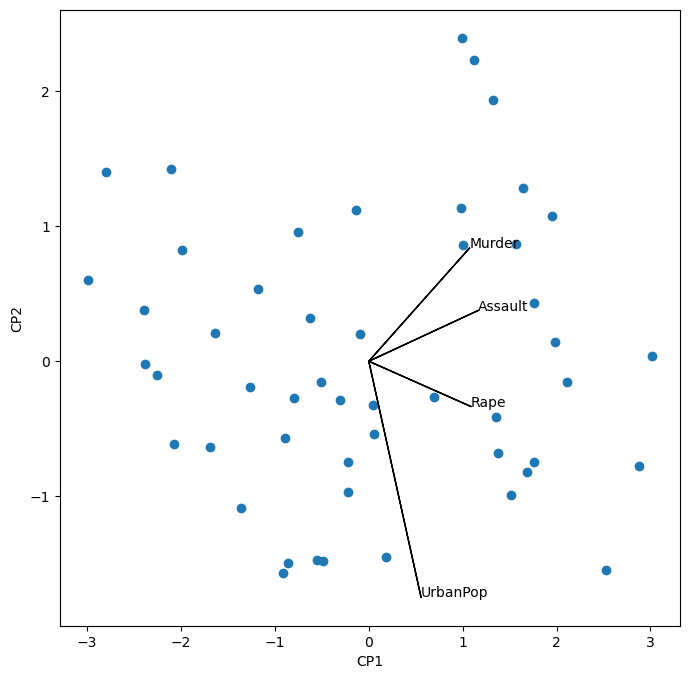

In [16]:
# Biplot
# Ajustes, extendemos longitud de las flechas e invertimos el eje y

i, j = 0, 1 # Componentes

scale_arrow = s_ = 2 # para extender la longitud de las flechas y que se vean mejor
scores[:,1] *= -1
pca.components_[1] *= -1 # gira el eje y (CP2)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel('CP%d' % (i+1))
ax.set_ylabel('CP%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i,k], s_*pca.components_[j,k])
    ax.text(s_*pca.components_[i,k], s_*pca.components_[j,k], arrests.columns[k])

In [18]:
# % de la Varianza explicada por los componentes 
print(pca.explained_variance_ratio_) # CP1 explica el 62% de la varianza

[0.62006039 0.24744129 0.0891408  0.04335752]


In [20]:
%%capture 
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 2 subplots uno al lado del otro
ticks = np.arange(pca.n_components_)+1 # para crear ticks en el eje horizontal
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Componente principal');
ax.set_ylabel('Proporción de la varianza explicada por cada componente')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
# capture suprime la visualización de la figura parcialmente terminada

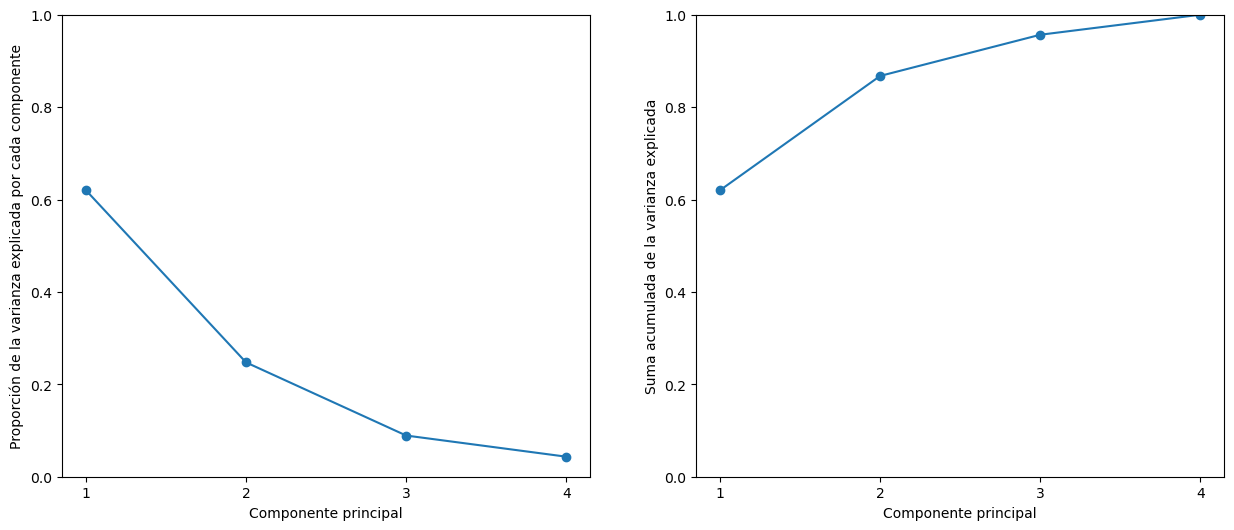

In [22]:
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o') 
ax.set_xlabel('Componente principal')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

### Ejemplo 2

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Vamos a trabajar con un dataset de vinos (de scikit-learn). Contiene características de 178 vinos y a qué segmento de consumidores pertenecen

In [28]:
# Importar el dataset y breve exploración
wine_data = pd.read_csv('C:\\Users\\Windows\\Documents\\GitHub\\BigDataUdeSA\\Tutorial_4\\Wine.csv')
print(wine_data.shape)
print(wine_data.dtypes)
print(wine_data.head())

(178, 14)
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06   

In [30]:
# Separamos datos entre X e Y (por ahora, haremos de cuenta que no contamos con Y)
wine_features = wine_data.iloc[:, 0:13].values
wine_customer_segment = wine_data.iloc[:, 13].values

# Vemos las etiquetas posibles de customer segment
wine_customer_segment_unique, counts = np.unique(wine_customer_segment, return_counts=True)
for value, count in zip(wine_customer_segment_unique, counts):
    print(f"Value: {value}, Count: {count}")

Value: 1, Count: 59
Value: 2, Count: 71
Value: 3, Count: 48


In [32]:
# Preprocesamiento. Estandarizar las variables
# Iniciar scaler y aplicarlo
sc = StandardScaler()
wine_features_transformed = sc.fit_transform(wine_features)

Por qué estandarizamos? El análisis es sensible a la varianza de las variables originales y eso puede ocasionar problemas a la hora de elegir los CPs

In [34]:
# Aplicar PCA
pca = PCA(n_components = 2)
wine_pca = pca.fit_transform(wine_features_transformed) # Obtenemos los scores

In [36]:
# Scores
wine_scores = wine_pca

# % de la Varianza explicada por los componentes
print("Varianza explicada:", pca.explained_variance_ratio_)
# El primer componente principal explica el 36% de la varianza, mientras que el segundo, explica el 19%

# Loading vectors
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 

# Visualizamos features y loadings
for i, loading_vector in enumerate(loading_vectors):
    print(f"\nLoading Vector CP{i+1}:")
    for j, feature in enumerate(wine_data.columns[:-1]):
        print(f"{feature}: {round(loading_vector[j],3)}")
    print()

Varianza explicada: [0.36198848 0.1920749 ]
Loadings:
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]]
Loadings del CP1:
 [ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]

Loading Vector CP1:
Alcohol: 0.144
Malic_Acid: -0.245
Ash: -0.002
Ash_Alcanity: -0.239
Magnesium: 0.142
Total_Phenols: 0.395
Flavanoids: 0.423
Nonflavanoid_Phenols: -0.299
Proanthocyanins: 0.313
Color_Intensity: -0.089
Hue: 0.297
OD280: 0.376
Proline: 0.287


Loading Vector CP2:
Alcohol: 0.484
Malic_Acid: 0.225
Ash: 0.316
Ash_Alcanity: -0.011
Magnesium: 0.3
Total_Phenols: 0.065
Flavanoids: -0.003
Nonflavanoid_Phenols: 0.029
Proanthocy

In [38]:
# Crear un DataFrame para los componentes principales
pca_df = pd.DataFrame(data=wine_pca, columns=['Componente_1', 'Componente_2'])

# Añadir la variable objetivo al DataFrame de los componentes principales
pca_df['Customer_Segment'] = wine_customer_segment
pca_df

,Componente_1,Componente_2,Customer_Segment
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1
...,...,...,...
173,-3.370524,2.216289,3
174,-2.601956,1.757229,3
175,-2.677839,2.760899,3
176,-2.387017,2.297347,3


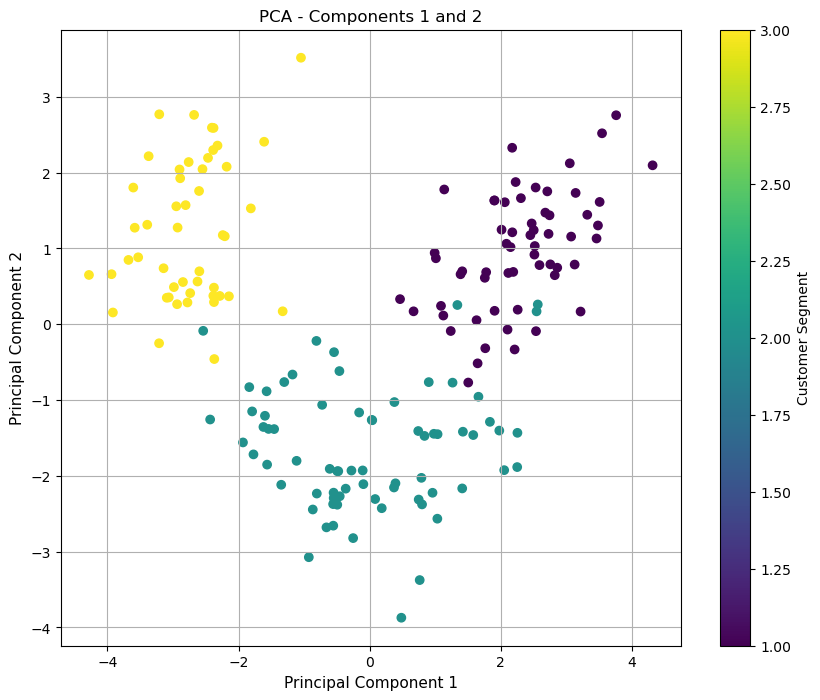

In [40]:
# Graficamos los componentes
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c = wine_data['Customer_Segment'], cmap='viridis')
plt.xlabel('Principal Component 1', fontsize=11)
plt.ylabel('Principal Component 2', fontsize=11)
plt.title('PCA - Components 1 and 2')
plt.colorbar(label='Customer Segment')
plt.grid(True)
plt.show()

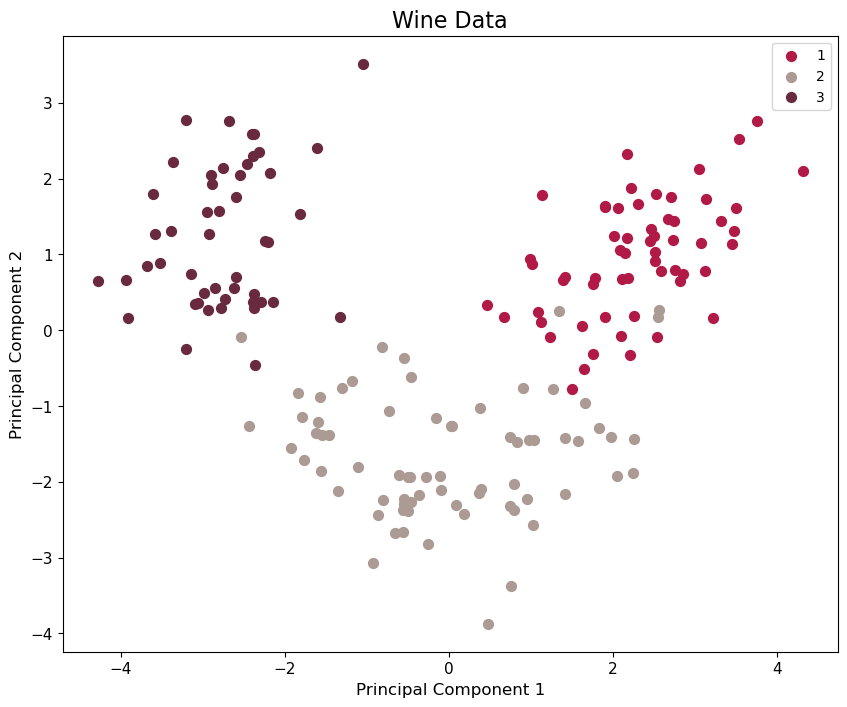

In [42]:
 # Otra forma de graficar
plt.figure(figsize=(10, 8))
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.title("Wine Data",fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

targets = [1, 2, 3]
colors = ['#b11a46', '#ac9a94', '#692a40']

for target, color in zip(targets,colors):
    indices_graf = pca_df['Customer_Segment'] == target
    plt.scatter(pca_df.loc[indices_graf, 'Componente_1'], pca_df.loc[indices_graf, 'Componente_2'], c = color, s = 50)

#plt.xlim(-4,4)
#plt.ylim(-4,4)
plt.legend(targets)

La representación bidimensional de los datos tridimensionales capta correctamente el patrón principal de los datos: las observaciones rojas, azules y verdes, siguen estando en la representación bidimensional. 

Nota: aquí usamos dos componentes pero podríamos haber usado 1 o más de 2. Para decidir qué número de componentes usar, podemos consultar un scree plot que nos muestre la proporción de variable explicada para cada uno de los componentes y la variación en la varianza total explicada por el total de los componentes.

Típicamente se elige la cantidad de componentes para la cual la proporción de la varianza explicada cae para cada componente principal adicional (cuando hay un codo en el scree plot)

Hagamos este grafico!

In [44]:
# PCA con todos los componentes

pca_all = PCA()
wine_pca2 = pca_all.fit_transform(wine_features_transformed) # Obtenemos los scores

In [46]:
%%capture 
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 2 subplots uno al lado del otro
ticks = np.arange(pca_all.n_components_)+1 # para crear ticks en el eje horizontal
ax = axes[0]
ax.plot(ticks, pca_all.explained_variance_ratio_ , marker='o', c = '#268e40')
ax.set_xlabel('Componente principal');
ax.set_ylabel('Proporción de la varianza explicada por cada componente')
ax.set_ylim([0,1.05])
ax.set_xticks(ticks)

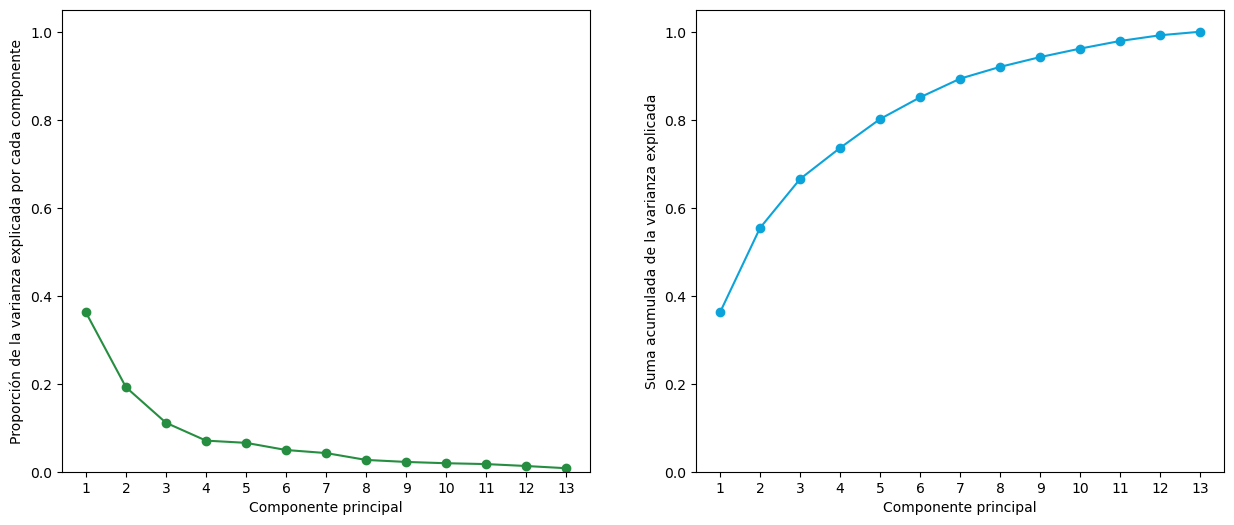

In [48]:
ax = axes[1]
ax.plot(ticks, pca_all.explained_variance_ratio_.cumsum(), marker='o', c = '#0ca3db') 
ax.set_xlabel('Componente principal')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1.05])
ax.set_xticks(ticks)
fig